# Smoothify - Hero Image Generator

Creates a hero image showing transformation from rasterized to smooth geometries.

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from smoothify import smoothify

plt.rcParams["figure.dpi"] = 300
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["font.family"] = "sans-serif"

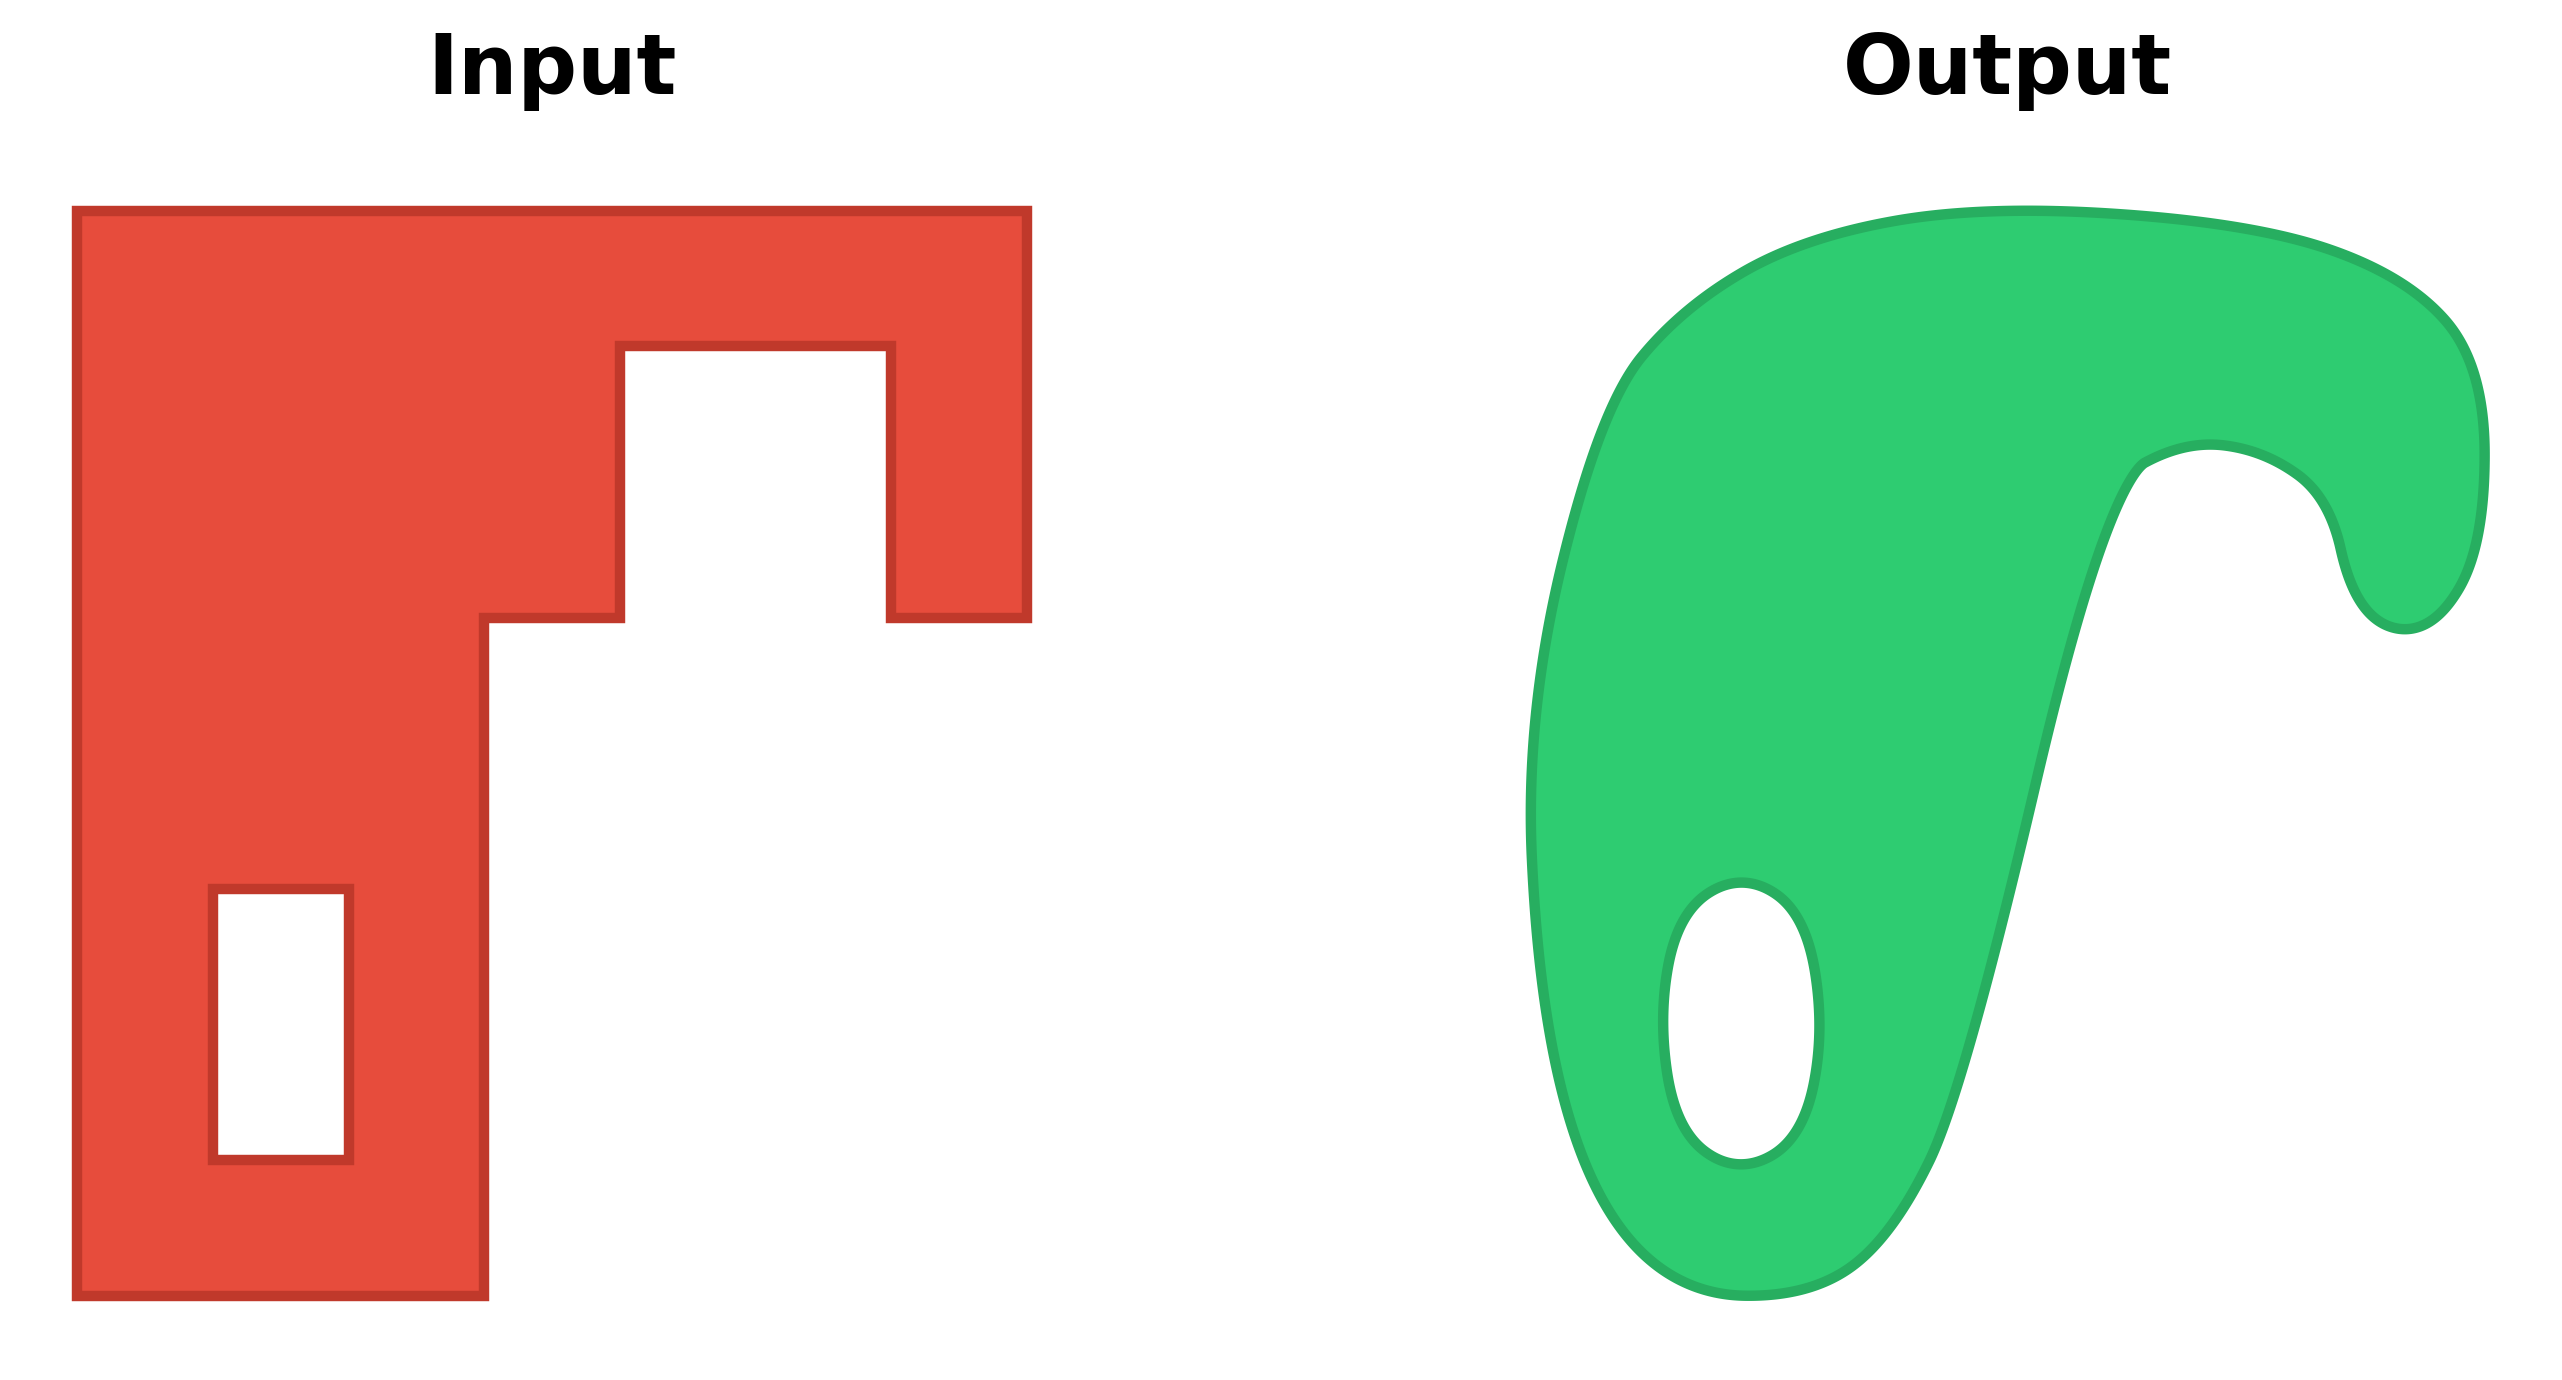


Hero image saved as 'smoothify_hero.png'


In [2]:
# Create a simple pixelated polygon with holes
def create_simple_shape_with_hole():
    """Create a simple L-shaped polygon with rectangular holes."""
    # Outer boundary - L shape on a grid
    outer_pixels = [
        (1, 10),
        (2, 10),
        (3, 10),
        (4, 10),
        (5, 10),
        (6, 10),
        (7, 10),
        (1, 9),
        (2, 9),
        (3, 9),
        (4, 9),
        (5, 9),
        (6, 9),
        (7, 9),
        (1, 8),
        (2, 8),
        (3, 8),
        (4, 8),
        (5, 8),
        (6, 8),
        (7, 8),
        (1, 7),
        (2, 7),
        (3, 7),
        (1, 6),
        (2, 6),
        (3, 6),
        (1, 5),
        (2, 5),
        (3, 5),
        (1, 4),
        (2, 4),
        (3, 4),
        (1, 3),
        (2, 3),
        (3, 3),
    ]

    # First hole in the upper right area
    hole1_pixels = [
        (5, 9),
        (6, 9),
        (5, 8),
        (6, 8),
    ]

    # Second hole in the vertical section
    hole2_pixels = [
        (2, 5),
        (2, 4),
    ]

    pixel_size = 10

    # Create outer shape
    outer_squares = []
    for x, y in outer_pixels:
        square = Polygon(
            [
                (x * pixel_size, y * pixel_size),
                ((x + 1) * pixel_size, y * pixel_size),
                ((x + 1) * pixel_size, (y + 1) * pixel_size),
                (x * pixel_size, (y + 1) * pixel_size),
            ]
        )
        outer_squares.append(square)

    from shapely.ops import unary_union

    outer = unary_union(outer_squares)

    # Create holes
    all_hole_pixels = hole1_pixels + hole2_pixels
    hole_squares = []
    for x, y in all_hole_pixels:
        square = Polygon(
            [
                (x * pixel_size, y * pixel_size),
                ((x + 1) * pixel_size, y * pixel_size),
                ((x + 1) * pixel_size, (y + 1) * pixel_size),
                (x * pixel_size, (y + 1) * pixel_size),
            ]
        )
        hole_squares.append(square)

    holes = unary_union(hole_squares)

    # Subtract holes from outer
    return outer.difference(holes)


# Create the shape
pixelated = create_simple_shape_with_hole()
smoothed = smoothify(
    pixelated, segment_length=8, smooth_iterations=6, preserve_area=True
)

# Create side-by-side comparison with smaller figure size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))


# Helper function to plot geometry
def plot_geometry(geom, ax, color, edge_color):
    if hasattr(geom, "geoms"):
        for g in geom.geoms:
            plot_geometry(g, ax, color, edge_color)
    else:
        # Plot exterior
        x, y = geom.exterior.xy
        ax.fill(x, y, color=color, alpha=1, edgecolor=edge_color, linewidth=2.5)

        # Plot holes
        for interior in geom.interiors:
            x, y = interior.xy
            ax.fill(x, y, color="white", alpha=1.0, edgecolor=edge_color, linewidth=2.5)


# Plot pixelated
plot_geometry(pixelated, ax1, "#e74c3c", "#c0392b")
ax1.set_aspect("equal")
ax1.axis("off")
ax1.set_title("Input", fontsize=20, fontweight="bold", pad=15)

# Plot smoothed
plot_geometry(smoothed, ax2, "#2ecc71", "#27ae60")
ax2.set_aspect("equal")
ax2.axis("off")
ax2.set_title("Output", fontsize=20, fontweight="bold", pad=15)

# fig.suptitle("Smoothify", fontsize=24, fontweight="bold", y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.savefig("smoothify_hero.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

print("\n" + "=" * 60)
print("Hero image saved as 'smoothify_hero.png'")
print("=" * 60)